In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sp
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(r"c:\Users\USER\Documents\CODES\Python Work to Do\1553768847-housing.csv")
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [3]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
5,-122.25,37.85,52,919,213.0,413,193,4.0368,NEAR BAY,269700
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,NEAR BAY,299200
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,NEAR BAY,241400
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,NEAR BAY,226700
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,NEAR BAY,261100


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [5]:
data["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [6]:
# Check for missing values
missing_values = data.isnull().sum()

# Calculate the percentage of missing data in each column
missing_percentage = (missing_values / len(data)) * 100

# Display the missing data statistics
print("Missing Values in each column:\n",missing_values)
print("\nPercentage of Missing Data:\n",missing_percentage)

Missing Values in each column:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

Percentage of Missing Data:
 longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
ocean_proximity       0.000000
median_house_value    0.000000
dtype: float64


In [7]:
# Remove rows with missing values
data_cleaned = data.dropna()

# Verify that missing values have beeen removed
print("Missing Values in each column after removal:")
print(data_cleaned.isnull().sum())

Missing Values in each column after removal:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64


In [8]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


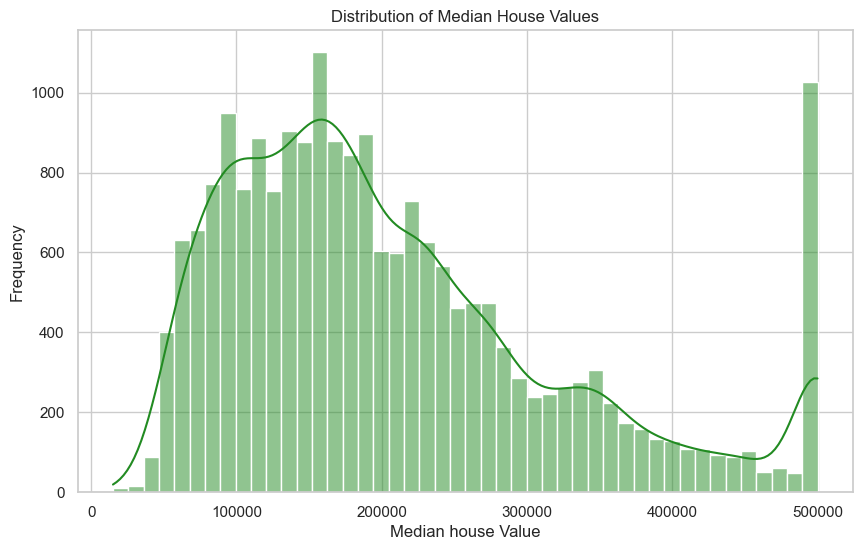

In [9]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned["median_house_value"], color="forestgreen", kde=True)
plt.title("Distribution of Median House Values")
plt.xlabel("Median house Value")
plt.ylabel("Frequency");

Using InterQuartile Range to Remove Outliers

In [10]:
Q1 = data_cleaned["median_house_value"].quantile(0.25)
print(Q1)
Q3 = data_cleaned["median_house_value"].quantile(0.75)
print(Q3)
IQR = Q3 - Q1

119500.0
264700.0


In [11]:
# Defining the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing outfliers
data_no_outliers1 = data_cleaned[(data_cleaned["median_house_value"] >= lower_bound) & (data_cleaned["median_house_value"] <= upper_bound)]

# Shape of the data before and after removal outlier removal
print("Original data shape:", data_cleaned.shape)
print("New data shape without outliers:", data_no_outliers1.shape)

Original data shape: (20433, 10)
New data shape without outliers: (19369, 10)


Outliers in Median Income

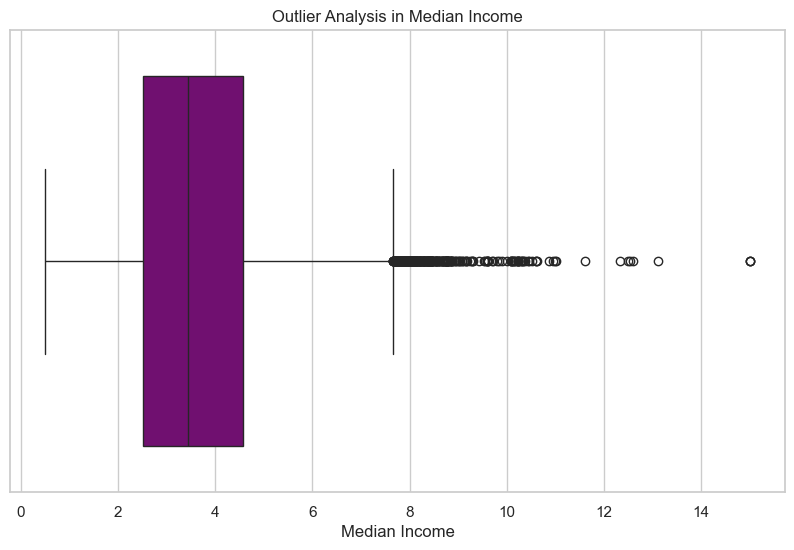

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_no_outliers1["median_income"], color="purple")
plt.title("Outlier Analysis in Median Income")
plt.xlabel("Median Income")
plt.show()

In [13]:
Q1 = data_no_outliers1["median_income"].quantile(0.25)
print(Q1)
Q3 = data_no_outliers1["median_income"].quantile(0.75)
print(Q3)
IQR = Q3 - Q1

# Defining the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing outfliers
data_no_outliers2 = data_no_outliers1[(data_no_outliers1["median_income"] >= lower_bound) & (data_no_outliers1["median_income"] <= upper_bound)]

# Shape of the data before and after removal outlier removal
print("Original data shape:", data_no_outliers1.shape)
print("New data shape without outliers:", data_no_outliers2.shape)

2.5223
4.5724
Original data shape: (19369, 10)
New data shape without outliers: (19026, 10)


In [14]:
data = data_no_outliers2

Correlation HeatMap

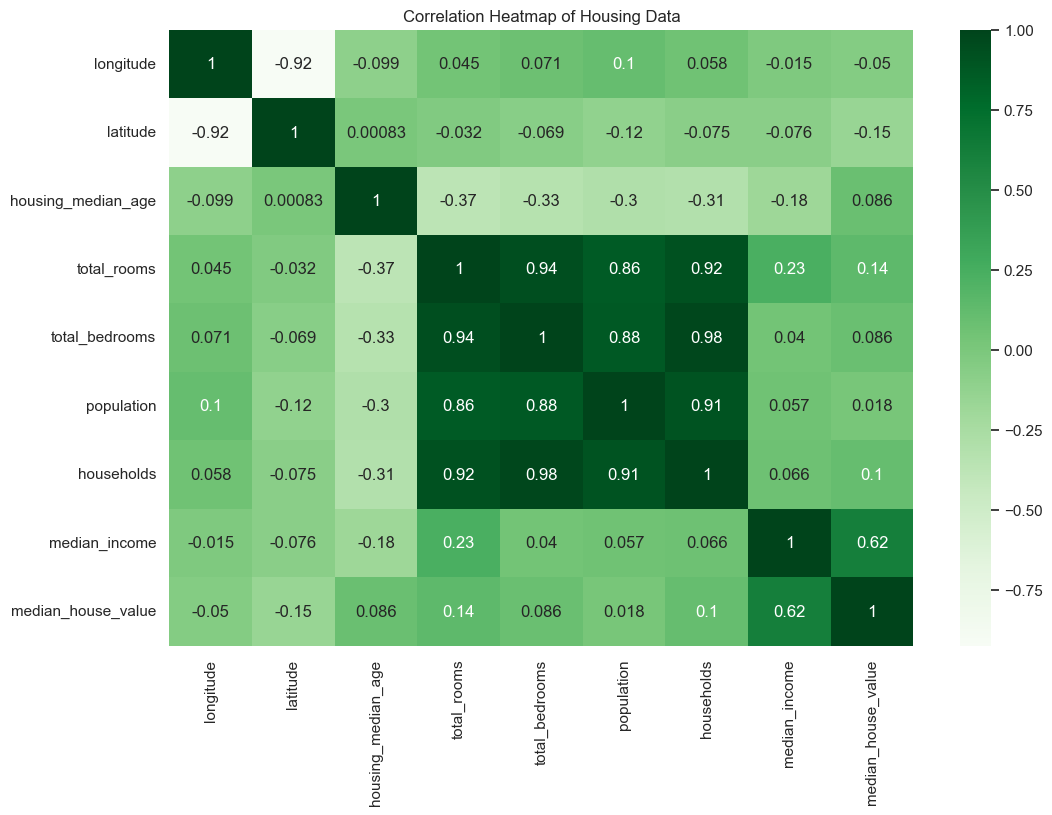

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="Greens")
plt.title("Correlation Heatmap of Housing Data")
plt.show()

To avoid multicollinearity among the independent variables, the total_bedrooms variable is dropped 

In [16]:
data = data.drop("total_bedrooms", axis = 1)
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'ocean_proximity',
       'median_house_value'],
      dtype='object')

In [17]:
# Unique value count for categorical data
for column in ["ocean_proximity"]:
    print(f"Unique value in {column}:", data[column].unique())

Unique value in ocean_proximity: ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


String Data Categorization to Dummy Variables

In [18]:
ocean_proximity_dummies = pd.get_dummies(data["ocean_proximity"], prefix="ocean_proximity", dtype=int)
data = pd.concat([data.drop("ocean_proximity", axis = 1), ocean_proximity_dummies], axis=1)
ocean_proximity_dummies

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,1,0
6,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [19]:
# dropping the island column to avoid the perfect multicollinearity assumption
data = data.drop("ocean_proximity_ISLAND", axis= 1)
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

Defining feature and target data

In [20]:
features = [col for col in data.columns if col not in ["median_house_value"]]
target = data["median_house_value"]

X = data[features]
y = target

# splitting the data into a training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

# split sizes
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 15220 samples
Test set size: 3806 samples


In [21]:
# Addig a constant to the predictors because statemodels' OLS doesn't include it by default
X_train_const = sp.add_constant(X_train)
X_train_const

,const,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
15578,1.0,-116.90,33.03,11,3213,1975,579,3.4750,1,0,0,0
1656,1.0,-121.93,37.89,13,2085,852,264,7.3445,0,1,0,0
9190,1.0,-118.35,34.32,52,102,54,32,1.9875,1,0,0,0
11839,1.0,-120.95,39.93,26,2023,922,365,2.8125,0,1,0,0
12267,1.0,-116.91,33.75,13,10886,4266,1955,2.3169,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15355,1.0,-117.32,33.25,7,8206,4399,1423,3.6301,1,0,0,0
9608,1.0,-120.51,37.29,20,4927,4205,1009,1.7679,0,1,0,0
12606,1.0,-121.49,38.50,32,2364,1331,449,3.3190,0,1,0,0
2907,1.0,-119.03,35.37,52,1503,554,277,1.6786,0,1,0,0


In [22]:
# Fit the OLS model
model_fitted = sp.OLS(y_train, X_train_const).fit()

# Printing Summary
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     1973.
Date:                Wed, 26 Nov 2025   Prob (F-statistic):               0.00
Time:                        04:42:21   Log-Likelihood:            -1.8879e+05
No. Observations:               15220   AIC:                         3.776e+05
Df Residuals:                   15208   BIC:                         3.777e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Prediction

In [23]:
# Adding a constant to the test predictors
X_test_const = sp.add_constant(X_test)

# Making Predictions
test_predictions = model_fitted.predict(X_test_const)
test_predictions

7322     153414.201880
465      239312.044180
12768     70054.781175
2617     189568.171319
13351    184267.795032
             ...      
11691    171568.742378
1454     215893.783794
7360     129935.765388
19118    232846.312809
13084    207120.213485
Length: 3806, dtype: float64

Checking OLS Assumptions

Assumption 1: Linearity

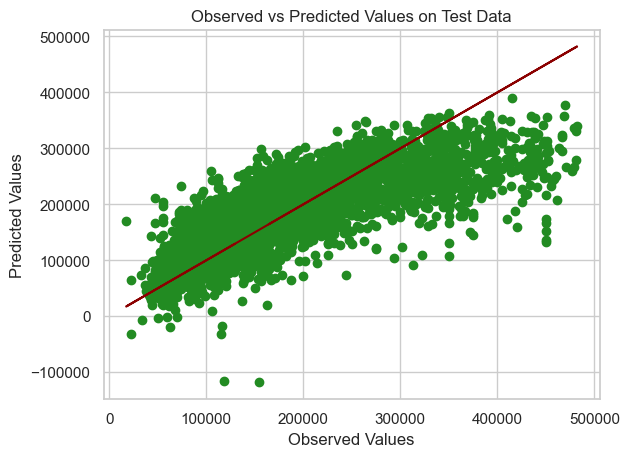

In [24]:
# Scatter plot for observed vs predicted values on test data
plt.scatter(y_test, test_predictions, color="forestgreen")
plt.xlabel("Observed Values")
plt.ylabel("Predicted Values")
plt.title("Observed vs Predicted Values on Test Data")
plt.plot(y_test, y_test, color="darkred") # line for perfect prediction (true values)
plt.show()

**Prediction Linear Relationship:** The red line (which represents a perfect prediction line) and the distribution of the data points suggest there's a positive linear relationship btw the observed and prediction values. This means that as the actual values increase, the predicted values also increase which is a good sign for linearity.

Assumption 2: Random Sample

In [25]:
import numpy as np
# Calculate the mean of the residuals
mean_residuals = np.mean(model_fitted.resid)

print(f"The mean of the residuals is {np.round(mean_residuals, 2)}")

The mean of the residuals is -0.0


While we cannot directly observe the true errors in the model, we can work with the residuals, which are the differences btw the observed values and predicted values from the model. if the model is well-fitted, the residuals should be randomly scattered around zero without any systematic patterns.

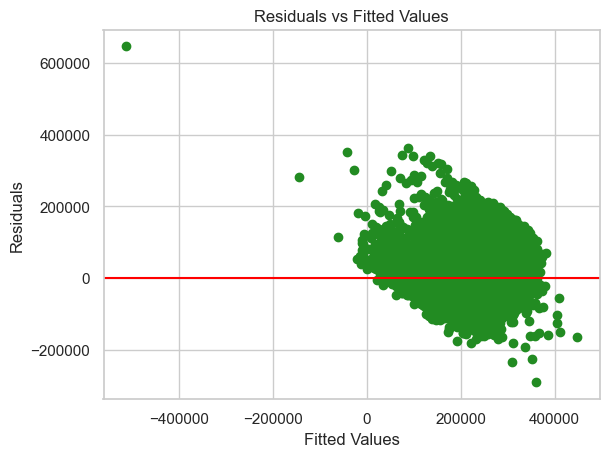

In [26]:
# Plotting the residuals
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color="forestgreen")
plt.axhline(y=0, color="red", linestyle="-")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

In this plot, we don't see any discernible patterns. The residuals are thus randomly distributed around the horizontal line at zero, with no clear shape or trend. if there's a pattern, or if the residuals show a systematic deviation from zero, it could suggest issues such as model misspecification, non-linearity, or omitted variable bias.

Assumption 3: Exogeneity

In [27]:
# Calculate the residuals
residuals = model_fitted.resid

# Check for correlation between residuals and each predictor
for column in X_train.columns:
    corr_coefficient = np.corrcoef(X_train[column], residuals)[0, 1]
    print(f"Correlation btw residuals and {column}: {np.round(corr_coefficient, 2)}")

Correlation btw residuals and longitude: -0.0
Correlation btw residuals and latitude: 0.0
Correlation btw residuals and housing_median_age: 0.0
Correlation btw residuals and total_rooms: -0.0
Correlation btw residuals and population: -0.0
Correlation btw residuals and households: -0.0
Correlation btw residuals and median_income: -0.0
Correlation btw residuals and ocean_proximity_<1H OCEAN: -0.0
Correlation btw residuals and ocean_proximity_INLAND: 0.0
Correlation btw residuals and ocean_proximity_NEAR BAY: -0.0
Correlation btw residuals and ocean_proximity_NEAR OCEAN: 0.0


Assumption 4: Homoskedasticty

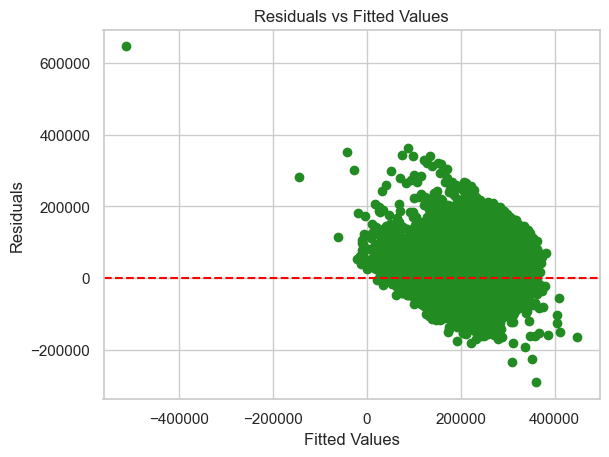

In [29]:
# Plotting the residuals
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color="forestgreen")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

**Random Scatter:** if plot shows a random scatter of residualss around the horizontal line a zero, it supports the homoscedasticity assumption.  

**Pattern or Shape:** if residuals display a pattern (such as a curve) or form a funnel shape where the spread increases with fitted values, this would suggest heteroscedasticiy, meaning variance of residuals changes with thelevel of the independent variables.


Train/Test/Evaluation with Sklearn

Scaling the Data

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation transformation to them test data
X_test_scaled = scaler.transform(X_test)

In [31]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Create and fit the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = lr.predict(X_test_scaled)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

# Print performance metrics
print(f"MSE on Test Set: {mse}")
print(f"RMSE on Test Set: {rmse}")

MSE on Test Set: 3529059611.57343
RMSE on Test Set: 59405.88869441673
